In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import pyplot as plt

In [2]:
points = pd.read_csv("../data/flowchart-data/charting-m-points.csv", encoding='unicode_escape')
points.drop(['1st', '2nd'], axis=1, inplace=True)

C:\Users\anhmi\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,9,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
points

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,0,0,0.0,0.0,0-0,1 (1),1,0,...,NaN,False,False,False,False,False,False,1,1,1
1,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,2,0,0,0.0,0.0,15-0,1 (2),1,0,...,NaN,False,False,False,False,False,False,1,1,1
2,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,3,0,0,0.0,0.0,30-0,1 (3),1,0,...,1.0,False,False,False,True,False,False,1,1,1
3,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,4,0,0,0.0,0.0,40-0,1 (4),1,0,...,NaN,True,False,False,False,False,False,1,1,1
4,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,5,0,0,1.0,0.0,0-0,2 (1),1,0,...,1.0,False,False,False,False,True,False,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619642,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,247,2,2,4.0,3.0,0-40,46 (4),0,0,...,NaN,False,False,False,False,False,False,1,0,1
619643,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,248,2,2,5.0,3.0,0-0,47 (1),0,0,...,NaN,False,False,False,False,False,False,1,1,1
619644,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,249,2,2,5.0,3.0,15-0,47 (2),0,0,...,NaN,False,False,False,False,False,False,1,1,1
619645,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,250,2,2,5.0,3.0,30-0,47 (3),0,0,...,NaN,False,False,False,False,False,False,1,1,1


In [4]:
set1 = points.loc[(points['Set1'] == 0) & (points['Set2'] == 0)]
set1

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,0,0,0.0,0.0,0-0,1 (1),1,0,...,NaN,False,False,False,False,False,False,1,1,1
1,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,2,0,0,0.0,0.0,15-0,1 (2),1,0,...,NaN,False,False,False,False,False,False,1,1,1
2,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,3,0,0,0.0,0.0,30-0,1 (3),1,0,...,1.0,False,False,False,True,False,False,1,1,1
3,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,4,0,0,0.0,0.0,40-0,1 (4),1,0,...,NaN,True,False,False,False,False,False,1,1,1
4,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,5,0,0,1.0,0.0,0-0,2 (1),1,0,...,1.0,False,False,False,False,True,False,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619446,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,51,0,0,3.0,5.0,40-0,9 (4),1,0,...,NaN,False,False,False,False,True,False,2,0,2
619447,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,52,0,0,3.0,5.0,40-15,9 (5),1,0,...,NaN,False,False,True,False,False,False,2,0,6
619448,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,53,0,0,3.0,5.0,40-30,9 (6),1,0,...,NaN,False,False,True,False,False,False,2,0,10
619449,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,54,0,0,3.0,5.0,40-40,9 (7),1,0,...,NaN,False,False,False,False,True,False,2,0,12


In [5]:
set1_unforced = set1.isUnforced.sum()
set1_forced = set1.isForced.sum()
set1_fsv = set1["1stIn"].sum()
set1_ssv = set1["2ndIn"].sum()
print(set1.isUnforced.sum())
print(set1_unforced/len(set1))
print((set1_unforced + set1_forced)/len(set1))

70276
0.3181853168224934
0.6365472120978879


In [6]:
set2 = points.loc[((points['Set1'] == 1) & (points['Set2'] == 0)) | ((points['Set1'] == 0) & (points['Set2'] == 1))]
set2

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
69,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,70,0,1,0.0,0.0,0-0,11 (1),1,0,...,NaN,False,False,True,False,False,False,2,0,8
70,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,71,0,1,0.0,0.0,0-15,11 (2),1,0,...,NaN,False,False,False,True,False,False,1,1,5
71,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,72,0,1,0.0,0.0,15-15,11 (3),1,0,...,NaN,False,False,True,False,False,False,1,1,9
72,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,73,0,1,0.0,0.0,30-15,11 (4),1,0,...,1.0,False,False,False,False,True,False,2,0,4
73,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,74,0,1,0.0,0.0,30-30,11 (5),1,0,...,NaN,False,False,False,True,False,False,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619503,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,108,0,1,5.0,3.0,0-0,18 (1),1,0,...,1.0,False,False,True,False,False,False,1,0,4
619504,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,109,0,1,5.0,3.0,0-15,18 (2),1,0,...,NaN,False,False,True,False,False,False,2,1,9
619505,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,110,0,1,5.0,3.0,15-15,18 (3),1,0,...,NaN,False,False,True,False,False,False,1,0,4
619506,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,111,0,1,5.0,3.0,15-30,18 (4),1,0,...,NaN,False,False,False,False,True,False,1,0,2


In [7]:
set2_unforced = set2.isUnforced.sum()
set2_forced = set2.isForced.sum()
set2_fsv = set2["1stIn"].sum()
set2_ssv = set2["2ndIn"].sum()
print(set2_unforced/len(set2))
print((set2_unforced + set2_forced)/len(set2))

0.30440315601934337
0.6262180489401157


In [8]:
set3 = points.loc[((points['Set1'] == 2) & (points['Set2'] == 0)) | ((points['Set1'] == 0) & (points['Set2'] == 2))| ((points['Set1'] == 1) & (points['Set2'] == 1))]
set3

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
122,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,123,1,1,0.0,0.0,0-0,19 (1),1,0,...,1.0,False,False,False,False,True,False,1,1,7
123,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,124,1,1,0.0,0.0,15-0,19 (2),1,0,...,1.0,False,False,False,False,True,False,1,1,1
124,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,125,1,1,0.0,0.0,30-0,19 (3),1,0,...,1.0,False,False,True,False,False,False,2,0,16
125,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,126,1,1,0.0,0.0,30-15,19 (4),1,0,...,1.0,False,False,False,True,False,False,1,1,11
126,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,127,1,1,0.0,0.0,40-15,19 (5),1,0,...,1.0,False,False,True,False,False,False,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619566,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,171,1,1,5.0,4.0,40-AD,28 (10),1,0,...,1.0,False,False,True,False,False,False,2,1,3
619567,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,172,1,1,5.0,4.0,40-40,28 (11),1,0,...,NaN,False,False,False,True,False,False,1,0,4
619568,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,173,1,1,5.0,4.0,40-AD,28 (12),1,0,...,NaN,False,False,True,False,False,False,2,1,3
619569,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,174,1,1,5.0,4.0,40-40,28 (13),1,0,...,NaN,False,False,False,True,False,False,1,0,2


In [9]:
set3_unforced = set3.isUnforced.sum()
set3_forced = set3.isForced.sum()
set3_fsv = set3["1stIn"].sum()
set3_ssv = set3["2ndIn"].sum()
print(set3_unforced/len(set3))
print((set3_unforced + set3_forced)/len(set3))

0.28744725738396626
0.6169402689873418


In [10]:
set4 = points.loc[((points['Set1'] == 2) & (points['Set2'] == 1)) | ((points['Set1'] == 1) & (points['Set2'] == 2))]
set4

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
1003,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...,178,2,1,0.0,0.0,0-0,26 (1),1,0,...,NaN,False,False,False,False,True,False,1,0,16
1004,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...,179,2,1,0.0,0.0,0-15,26 (2),1,0,...,0.0,False,False,False,False,False,True,1,0,0
1005,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...,180,2,1,0.0,0.0,0-30,26 (3),1,0,...,NaN,False,False,True,False,False,False,2,1,3
1006,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...,181,2,1,0.0,0.0,15-30,26 (4),1,0,...,NaN,False,False,False,False,True,False,1,0,10
1007,20220703-M-Wimbledon-R16-Novak_Djokovic-Tim_Va...,182,2,1,0.0,0.0,15-40,26 (5),1,0,...,NaN,False,False,False,True,False,False,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619606,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,211,2,1,4.0,4.0,0-40,37 (4),1,0,...,NaN,False,False,False,False,False,False,2,0,1
619607,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,212,2,1,4.0,5.0,0-0,38 (1),1,0,...,NaN,False,False,False,False,False,False,2,1,1
619608,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,213,2,1,4.0,5.0,15-0,38 (2),1,0,...,NaN,False,False,False,False,False,False,2,1,1
619609,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,214,2,1,4.0,5.0,30-0,38 (3),1,0,...,NaN,False,False,False,False,False,False,2,1,1


In [11]:
set4_unforced = set4.isUnforced.sum()
set4_forced = set4.isForced.sum()
set4_fsv = set4["1stIn"].sum()
set4_ssv = set4["2ndIn"].sum()
print(set4_unforced/len(set4))
print((set4_unforced + set4_forced)/len(set4))

0.2733722657650735
0.6095743045950515


In [12]:
set5 = points.loc[((points['Set1'] == 2) & (points['Set2'] == 2))]
set5

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
4404,20220603-M-Roland_Garros-R64-Carlos_Alcaraz-Al...,293,2,2,0.0,0.0,0-0,46 (1),1,0,...,NaN,False,False,False,True,False,False,1,0,2
4405,20220603-M-Roland_Garros-R64-Carlos_Alcaraz-Al...,294,2,2,0.0,0.0,0-15,46 (2),1,0,...,NaN,False,False,True,False,False,False,1,0,16
4406,20220603-M-Roland_Garros-R64-Carlos_Alcaraz-Al...,295,2,2,0.0,0.0,0-30,46 (3),1,0,...,1.0,False,False,False,False,True,False,2,1,5
4407,20220603-M-Roland_Garros-R64-Carlos_Alcaraz-Al...,296,2,2,0.0,0.0,15-30,46 (4),1,0,...,NaN,False,False,False,True,False,False,2,1,1
4408,20220603-M-Roland_Garros-R64-Carlos_Alcaraz-Al...,297,2,2,0.0,0.0,30-30,46 (5),1,0,...,NaN,False,False,True,False,False,False,2,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619642,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,247,2,2,4.0,3.0,0-40,46 (4),0,0,...,NaN,False,False,False,False,False,False,1,0,1
619643,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,248,2,2,5.0,3.0,0-0,47 (1),0,0,...,NaN,False,False,False,False,False,False,1,1,1
619644,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,249,2,2,5.0,3.0,15-0,47 (2),0,0,...,NaN,False,False,False,False,False,False,1,1,1
619645,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,250,2,2,5.0,3.0,30-0,47 (3),0,0,...,NaN,False,False,False,False,False,False,1,1,1


In [13]:
set5_unforced = set5.isUnforced.sum()
set5_forced = set5.isForced.sum()
set5_fsv = set5["1stIn"].sum()
set5_ssv = set5["2ndIn"].sum()
print(set5_unforced/len(set5))
print((set5_unforced + set5_forced)/len(set5))

0.2697038972349227
0.6071195297191379


In [14]:
p1_set1_unforced = set1.loc[((set1['isUnforced'] == True) & (set1['PtWinner'] == 2))]
p2_set1_unforced = set1.loc[((set1['isUnforced'] == True) & (set1['PtWinner'] == 1))]
print(set1_unforced.sum())
print(len(p1_set1_unforced))
print(len(p2_set1_unforced))

70276
35589
34687


In [ ]:
trimmed = set1[["match_id", "isUnforced"]]
df_list = [pd.DataFrame(i) for i in trimmed.groupby(trimmed.match_id.values).agg(list).to_dict('records')]
df_list

In [ ]:
len(df_list)

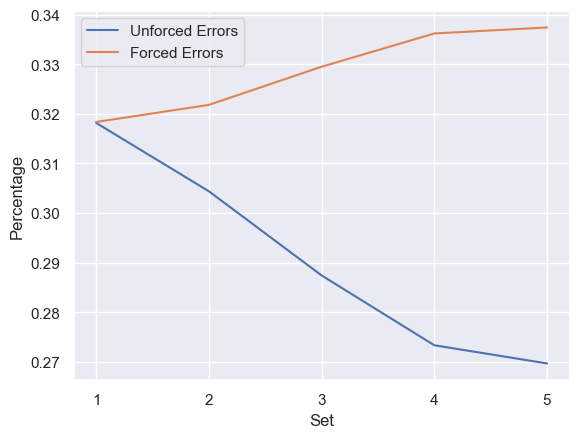

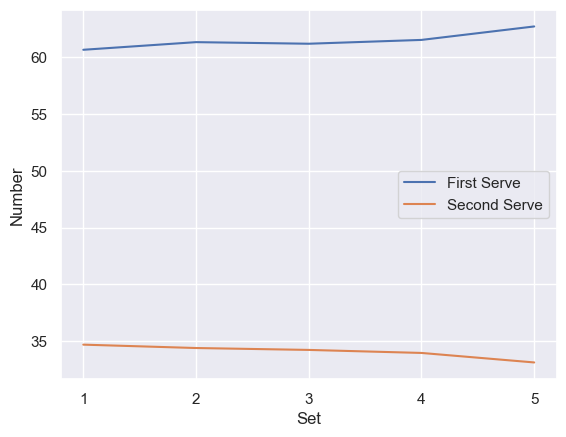

In [19]:
sets_total = [len(set1), len(set2), len(set3), len(set4), len(set5)]
sets_unforced = [set1_unforced, set2_unforced, set3_unforced, set4_unforced, set5_unforced]
sets_forced = [set1_forced, set2_forced, set3_forced, set4_forced, set5_forced]

sets_unforced = [(sets_unforced[i] / sets_total[i]) for i in range(len(sets_unforced))]
sets_forced = [(sets_forced[i] / sets_total[i]) for i in range(len(sets_forced))]

sets = range(1,6)
sns.set()

plt.figure(0)

plt.plot(sets, sets_unforced, label="Unforced Errors")
plt.plot(sets, sets_forced, label="Forced Errors")

plt.xlabel('Set')
plt.ylabel('Percentage')

plt.legend()

plt.xticks(sets, fontweight='light')
plt.yticks(fontweight='light')
plt.savefig("../plots/errors.png")

plt.figure(1)

sets_fsv = [set1_fsv, set2_fsv, set3_fsv, set4_fsv, set5_fsv]
sets_ssv = [set1_ssv, set2_ssv, set3_ssv, set4_ssv, set5_ssv]

sets_fsv = [(sets_fsv[i] / sets_total[i] * 100) for i in range(len(sets_fsv))]
sets_ssv = [(sets_ssv[i] / sets_total[i] * 100) for i in range(len(sets_ssv))]

plt.plot(sets, sets_fsv, label="First Serve")
plt.plot(sets, sets_ssv, label="Second Serve")

plt.xlabel('Set')
plt.ylabel('Number')

plt.xticks(sets, fontweight='light')
plt.yticks(fontweight='light')

plt.legend()
plt.savefig("../plots/serves.png")

plt.show()

In [23]:
print(len(set1["match_id"].unique()))
print(len(set2["match_id"].unique()))
print(len(set3["match_id"].unique()))
print(len(set4["match_id"].unique()))
print(len(set5["match_id"].unique()))

3599
3588
1985
628
265


In [31]:
np.setdiff1d(np.array(set1["match_id"].unique()), np.array(set2["match_id"].unique()))

array(['19901104-M-Paris_Masters-F-Boris_Becker-Stefan_Edberg',
       '20110820-M-Cincinnati_Masters-SF-Novak_Djokovic-Tomas_Berdych',
       '20120106-M-Doha_EXH-RR-Jo_Wilfried_Tsonga-Stefan_Edberg',
       '20140113-M-Australian_Open-R128-Bernard_Tomic-Rafael_Nadal',
       '20150208-M-Montpellier-F-Richard_Gasquet-Jerzy_Janowicz',
       '20150417-M-Monte_Carlo_Masters-QF-Milos_Raonic-Tomas_Berdych',
       '20160304-M-Quimper_CH-QF-Paul_Henri_Mathieu-Igor_Sijsling',
       '20170925-M-Chengdu-F-Denis_Istomin-Marcos_Baghdatis',
       '20210113-M-Antalya-F-Alex_De_Minaur-Alexander_Bublik',
       '20220330-M-Miami_Masters-QF-Francisco_Cerundolo-Jannik_Sinner',
       '20220501-M-Munich-F-Botic_Van_De_Zandschulp-Holger_Rune'],
      dtype=object)

In [35]:
unique_matches_set1 = set1["match_id"].unique()
unique_matches_set1_df_dict = {elem : pd.DataFrame() for elem in unique_matches_set1}
for key in unique_matches_set1_df_dict.keys():
    unique_matches_set1_df_dict[key] = set1[:][set1.match_id == key]

KeyError: 0

In [ ]:
unique_matches_set1_df_dict